# Function Transformer

In [72]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [74]:
df = pd.read_csv("Social_Network_Ads.csv", usecols=["Age", "EstimatedSalary", "Purchased"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [76]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [78]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [80]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [82]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
X_train.skew()

Age                0.259191
EstimatedSalary    0.475029
dtype: float64

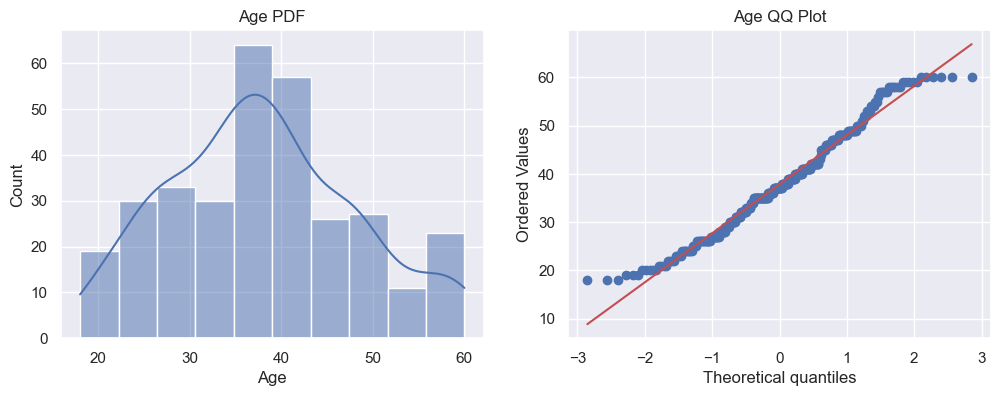

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.histplot(X_train["Age"], kde=True)
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train["Age"], dist="norm", plot=plt)
plt.title("Age QQ Plot")
plt.show()

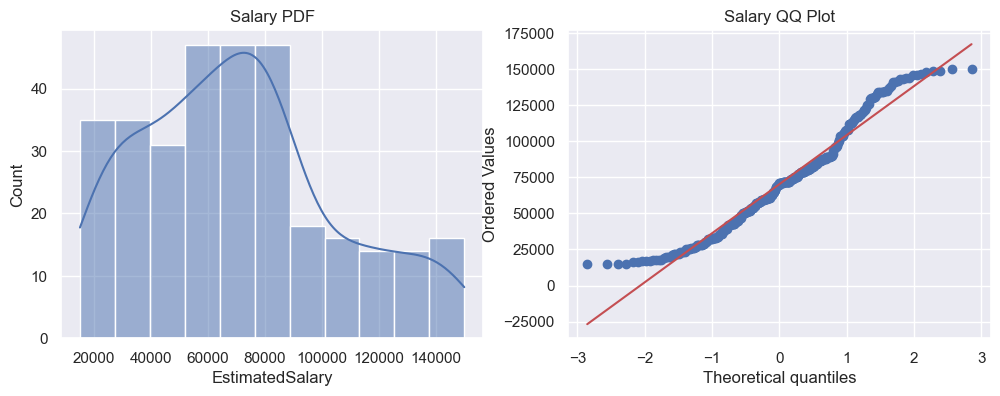

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.histplot(X_train["EstimatedSalary"], kde=True)
plt.title("Salary PDF")

plt.subplot(122)
stats.probplot(X_train["EstimatedSalary"], dist="norm", plot=plt)
plt.title("Salary QQ Plot")
plt.show()

# Without Transformation

In [26]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [28]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

print(f"Accuracy Logistic Regression: {accuracy_score(y_test, y_pred1)*100:.2f}%")
print(f"Accuracy Decision Tree: {accuracy_score(y_test, y_pred2)*100:.2f}%")

Accuracy Logistic Regression: 88.75%
Accuracy Decision Tree: 83.75%


# With Transformation

In [31]:
trf = FunctionTransformer(func=np.log1p)

In [35]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [37]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [39]:
clf1.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred1 = clf1.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print(f"Accuracy Logistic Regression: {accuracy_score(y_test, y_pred1)*100:.2f}%")
print(f"Accuracy Decision Tree: {accuracy_score(y_test, y_pred2)*100:.2f}%")

Accuracy Logistic Regression: 85.00%
Accuracy Decision Tree: 85.00%


# Cross Validation

In [41]:
X_transformed = trf.fit_transform(X)

In [43]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

LR = np.mean(cross_val_score(clf1, X_transformed, y, scoring="accuracy", cv=10))
DT = np.mean(cross_val_score(clf2, X_transformed, y, scoring="accuracy", cv=10))

In [45]:
print(f"Accuracy Logistic Regression: {LR*100:.2f}%")
print(f"Accuracy Decision Tree: {DT*100:.2f}%")

Accuracy Logistic Regression: 79.00%
Accuracy Decision Tree: 83.50%


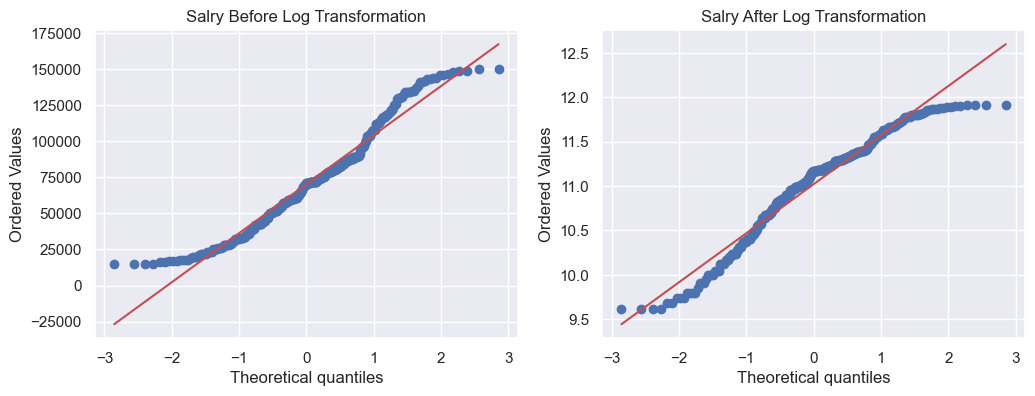

In [47]:
plt.figure(figsize=(12,4))

plt.subplot(121)
stats.probplot(X_train["EstimatedSalary"], dist="norm", plot=plt)
plt.title("Salry Before Log Transformation")

plt.subplot(122)
stats.probplot(X_train_transformed["EstimatedSalary"], dist="norm", plot=plt)
plt.title("Salry After Log Transformation")

plt.show()

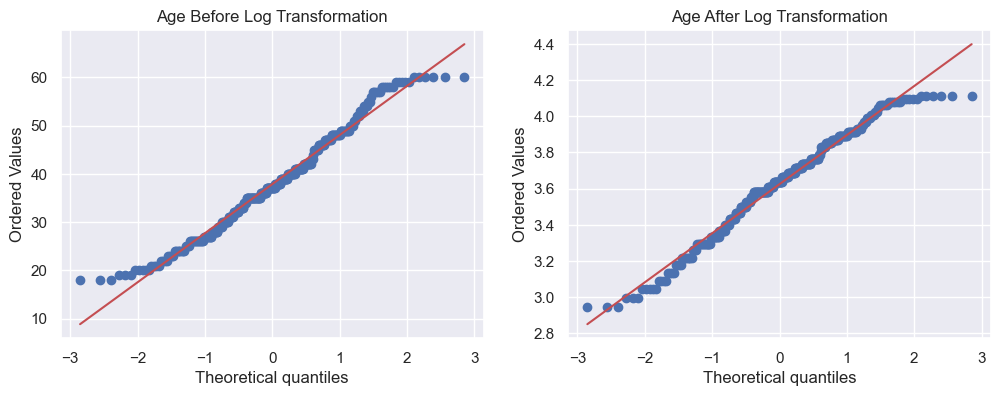

In [49]:
plt.figure(figsize=(12,4))

plt.subplot(121)
stats.probplot(X_train["Age"], dist="norm", plot=plt)
plt.title("Age Before Log Transformation")

plt.subplot(122)
stats.probplot(X_train_transformed["Age"], dist="norm", plot=plt)
plt.title("Age After Log Transformation")

plt.show()

Transformation only on `EstimtedSalary` and leave `Age` as it is to see the imporovement

In [51]:
trf2 = ColumnTransformer(
    [
        ("log", FunctionTransformer(np.log1p),
         ["EstimatedSalary"]
        )
    ],
    remainder="passthrough"
)

In [53]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [55]:
clf3 = LogisticRegression()
clf4 = DecisionTreeClassifier()

In [57]:
clf3.fit(X_train_transformed2, y_train)
clf4.fit(X_train_transformed2, y_train)

y_pred3 = clf3.predict(X_test_transformed2)
y_pred4 = clf4.predict(X_test_transformed2)

print(f"Accuracy Logistic Regression: {accuracy_score(y_test, y_pred3)*100:.2f}%")
print(f"Accuracy Decision Tree: {accuracy_score(y_test, y_pred4)*100:.2f}%")

Accuracy Logistic Regression: 88.75%
Accuracy Decision Tree: 85.00%


# Cross Validation

In [60]:
X_transformed2 = trf2.fit_transform(X)

clf5 = LogisticRegression()
clf6 = DecisionTreeClassifier()

LR5 = np.mean(cross_val_score(clf5, X_transformed2, y, scoring="accuracy", cv=10))
DT6 = np.mean(cross_val_score(clf6, X_transformed2, y, scoring="accuracy", cv=10))

print(f"Accuracy Logistic Regression: {LR5*100:.2f}%")
print(f"Accuracy Decision Tree: {DT6*100:.2f}%")

Accuracy Logistic Regression: 80.25%
Accuracy Decision Tree: 83.75%


# Apply through our custom function

In [63]:
def custTransformation(transform, data_frame, theme):
    df = pd.read_csv(data_frame, usecols=["Age", "EstimatedSalary", "Purchased"])
    X = df.iloc[:,0:2]
    y = df.iloc[:,2]

    trf = ColumnTransformer(
    [
        ("log", FunctionTransformer(transform),
         ["EstimatedSalary"]
        )
    ],
    remainder="passthrough"
    )
    
    X_transform = trf.fit_transform(X)
    clf = LogisticRegression()

    LR = np.mean(cross_val_score(clf, X_transform, y, scoring="accuracy", cv=10))
    print(f"Accuracy Logistic Regression: {LR*100:.2f}%")

    sns.set_theme()
    df = sns.load_dataset(theme)
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X["EstimatedSalary"], dist="norm", plot=plt)
    plt.title("Salary Before Transformation")

    plt.subplot(122)
    stats.probplot(X_transform[:, 0], dist="norm", plot=plt)
    plt.title("Salary After Transformation")

    plt.show()

Accuracy Logistic Regression: 83.75%


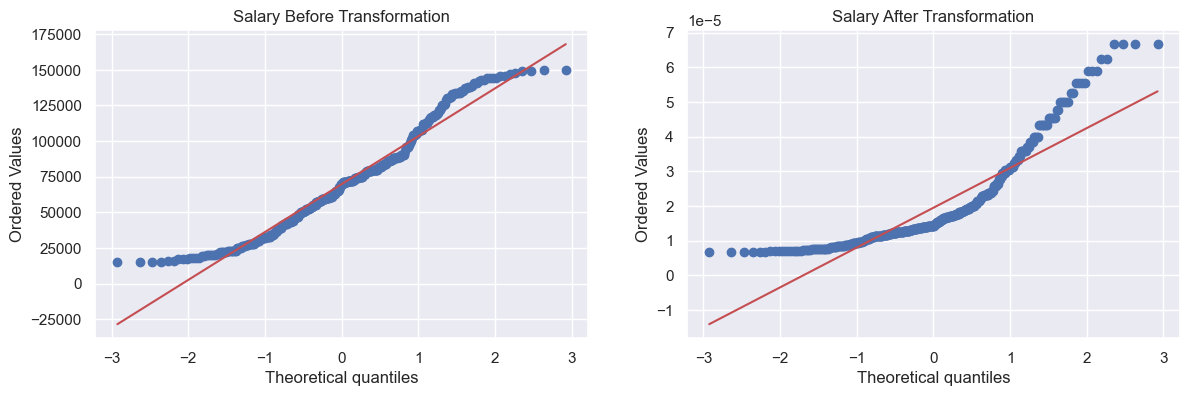

In [65]:
custTransformation(lambda x : 1/(x+0.01), "Social_Network_Ads.csv", "penguins")

Accuracy Logistic Regression: 82.75%


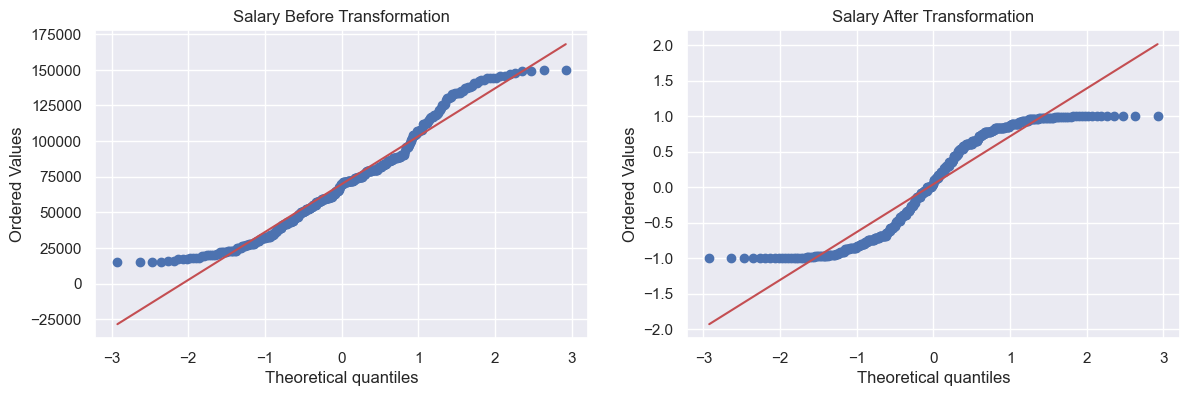

In [70]:
custTransformation(np.sin, "Social_Network_Ads.csv", "penguins")